In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [3]:
# 0 for Glucose, BloodPressure, SkinThickness, Insulin, BMI doesn't make sense and indicates missing value
dfd=pd.read_csv('health care diabetes.csv')
dfd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# dont have null values but 0 doe
dfd.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# replace 0 values with NaN for selected columns
dfd[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dfd[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [7]:
# now null values show
dfd.isnull().sum().value_counts(normalize=True)

0      0.444444
11     0.111111
227    0.111111
374    0.111111
5      0.111111
35     0.111111
dtype: float64

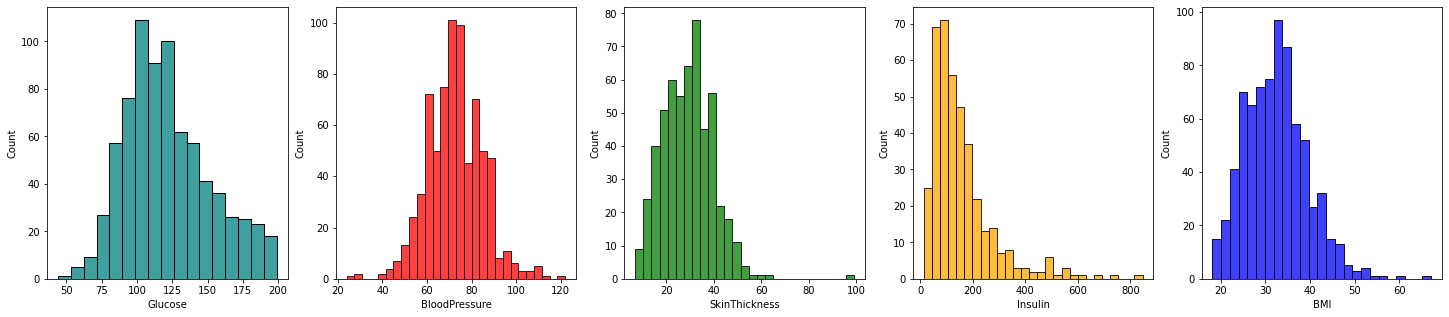

In [8]:
# exploring these variables using histograms
x, axes = plt.subplots(1, 5, figsize=(25,5))
sns.histplot(dfd.Glucose, ax=axes[0], color='teal')
sns.histplot(dfd.BloodPressure, ax=axes[1], color='red')
sns.histplot(dfd.SkinThickness, ax=axes[2], color='green')
sns.histplot(dfd.Insulin, ax=axes[3], color='orange')
sns.histplot(dfd.BMI, ax=axes[4], color='blue')
plt.show()

In [9]:
dfd2=dfd.dropna()

In [10]:
dfd2.shape

(392, 9)

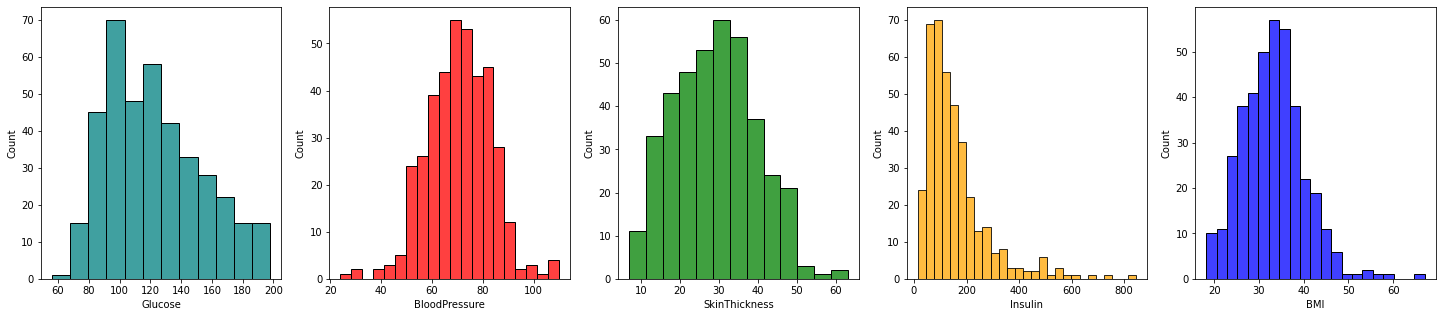

In [11]:
# dropped the missing values
x, axes = plt.subplots(1, 5, figsize=(25,5))
sns.histplot(dfd2.Glucose, ax=axes[0], color='teal')
sns.histplot(dfd2.BloodPressure, ax=axes[1], color='red')
sns.histplot(dfd2.SkinThickness, ax=axes[2], color='green')
sns.histplot(dfd2.Insulin, ax=axes[3], color='orange')
sns.histplot(dfd2.BMI, ax=axes[4], color='blue')
plt.show()

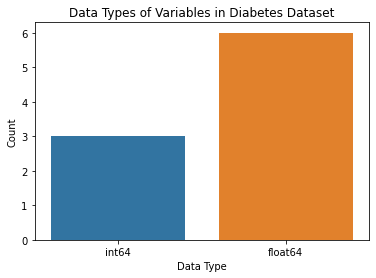

In [12]:
# count (frequency) plot describing the data types and the count of variables
sns.countplot(data=dfd, x=dfd.dtypes)
plt.title('Data Types of Variables in Diabetes Dataset')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

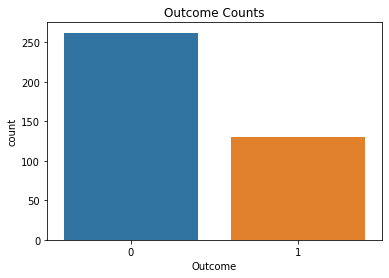

In [13]:
# check the balance of the data
sns.countplot(x='Outcome', data=dfd2)
plt.title('Outcome Counts')
plt.show()
# the dataset is imbalanced, with more patients having an outcome of 0 (no diabetes) than 1 (diabetes)

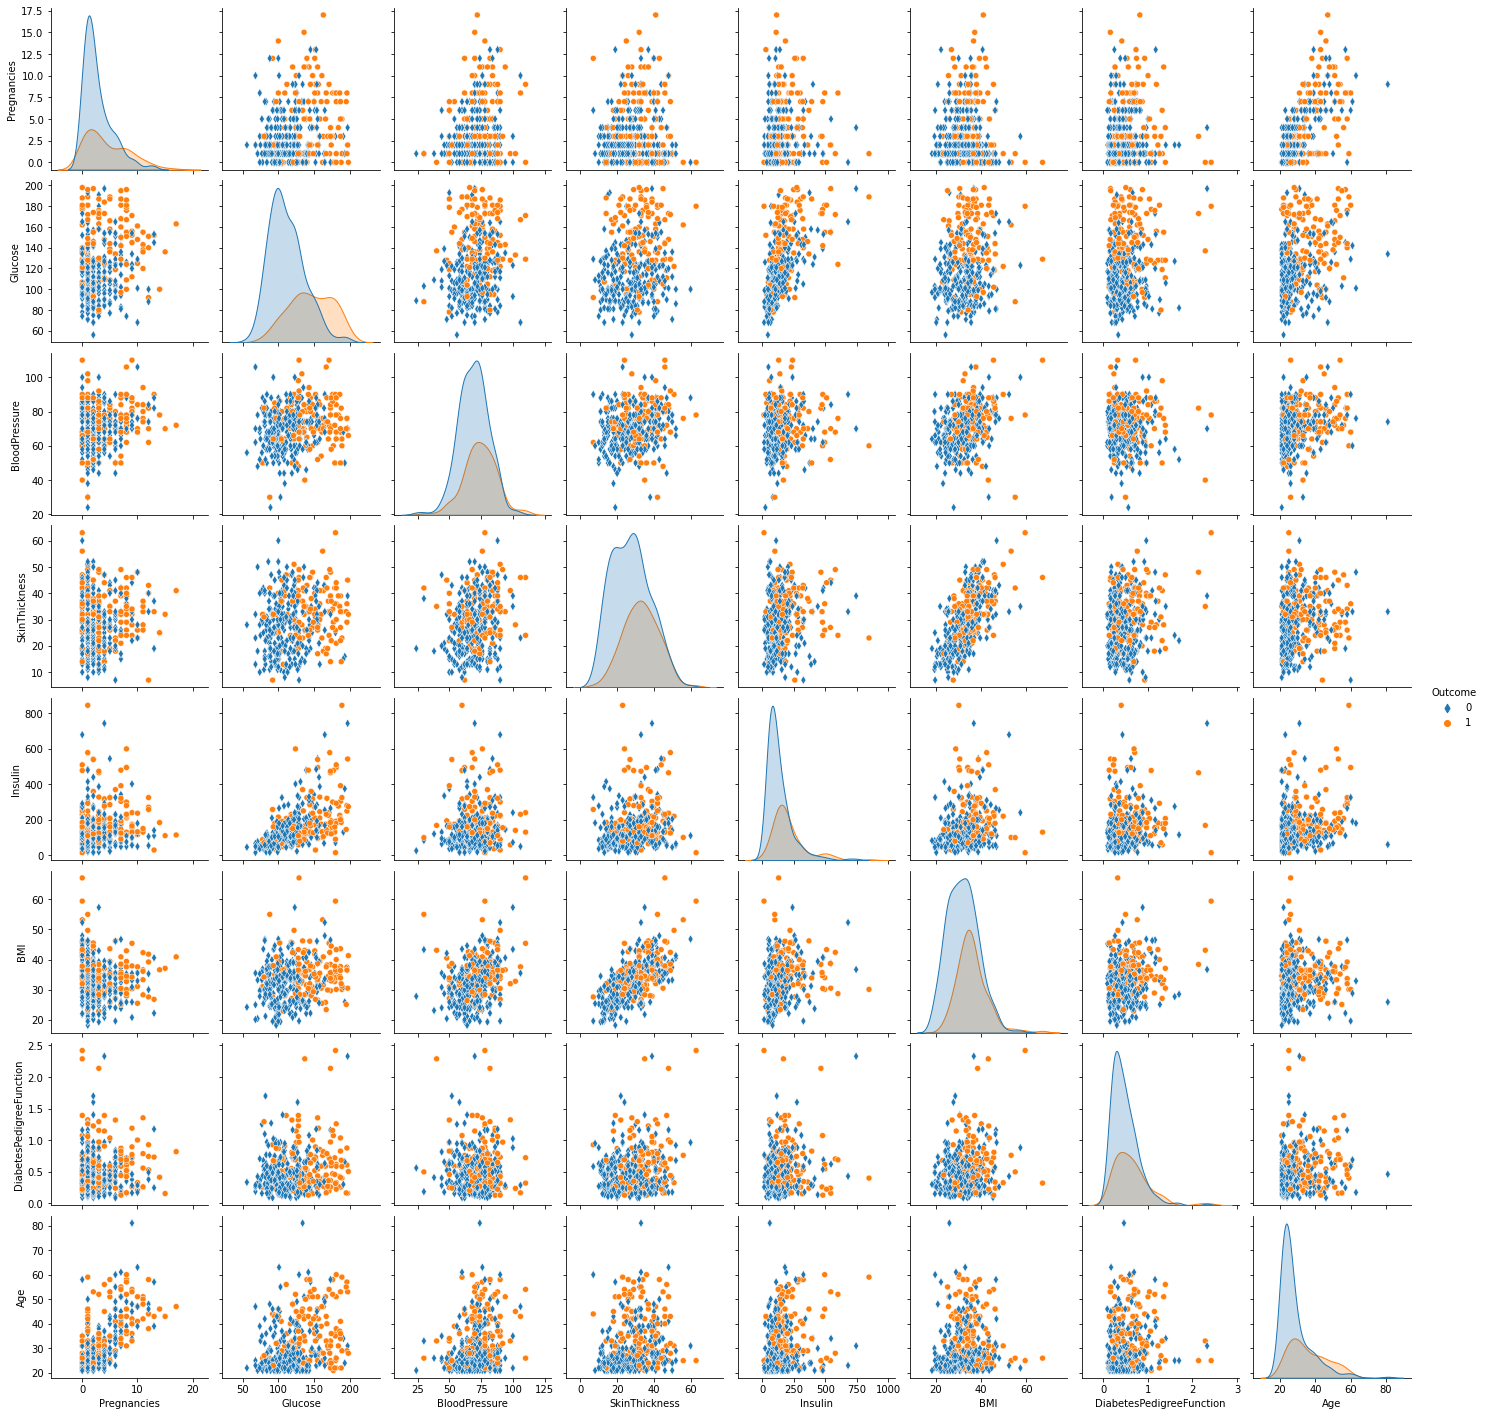

In [14]:
# scatter charts between the pair of variables to understand the relationships
sns.pairplot(dfd2, hue='Outcome', markers=['d', 'o'])
plt.show()

### Scatterplot findings
-Age and Pregnancies shows a positive correlation. As the number of pregnancies increase, the age of the patient tends to increase as well.

-Glucose and Outcome shows a positive correlation. Patients with higher glucose levels are more likely to have diabetes.

-BloodPressure and Outcome does not show a clear correlation between the two variables.

-SkinThickness and BMI shows a positive correlation. Patients with higher BMI tend to have higher skin thickness.

-Insulin and Glucose shows a positive correlation. Patients with higher glucose levels tend to have higher insulin levels.

-BMI and Outcome shows a positive correlation. Patients with higher BMI levels are more likely to have diabetes.

-DiabetesPedigreeFunction and Age shows that patients with higher diabetes pedigree function tend to be older.

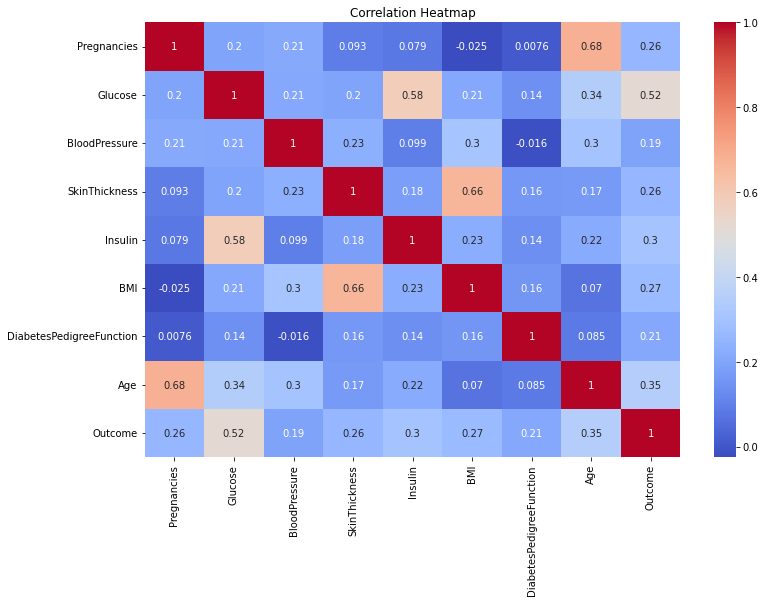

In [15]:
# correlation analysis with a heatmap
corr = dfd2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# glucose has the biggest correlation with having diabetes

In [16]:
# separate the input data from the target variable, so that the model can learn the relationship between the two.
X = dfd2.drop('Outcome', axis=1)
# prepare data to predict outcome by setting it equal to y
y = dfd2['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 8) (79, 8)
(313,) (79,)


In [18]:
# so we can refer to the variable name instead of having to type out the entire classifier name each time we want to use it.
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
svm = SVC()

In [19]:
# creating a dictionary named models that maps each algorithm name to its corresponding model.
models = {'KNN': knn, 'Logistic Regression': lr, 'Random Forest': rf, 'Support Vector Machine': svm}

In [20]:
# perform cross-validation on classification models using stratified 5-fold cross-validation and report the mean accuracy and standard deviation of the accuracy scores for each model
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f'{name} Accuracy: {np.mean(scores)} +/- {np.std(scores)}')

KNN Accuracy: 0.7245050308341447 +/- 0.027375430575277974
Logistic Regression Accuracy: 0.7780266147354755 +/- 0.030093848040059545
Random Forest Accuracy: 0.7705615060045439 +/- 0.02999707669138516
Support Vector Machine Accuracy: 0.77036676403765 +/- 0.012148198212065897


In [21]:
# Train the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check if predict_proba is available
if hasattr(model, 'predict_proba'):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
elif hasattr(model, 'decision_function'):
    y_scores = model.decision_function(X_test)  # provides confidence scores
    y_prob = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())  # Normalize to [0, 1] to make them comparable to probabilities
else:
    raise AttributeError("Model does not have 'predict_proba' or 'decision_function' attribute.") # no predict_proba/decision_function attribute, no probabilities or confidence scores so raise error

In [22]:
# generates a classification report by comparing the predicted labels y_pred with the true labels y_test.
report = classification_report(y_test, y_pred)
# AUC score provides a summary of the model's performance to distinguish between positive and negative samples across different classification thresholds.
auc = roc_auc_score(y_test, y_prob)

In [23]:
# classification report is a summary of the model's performance for each class
print("Classification Report:")
print(report)
print("AUC: {:.3f}".format(auc))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        52
           1       0.73      0.41      0.52        27

    accuracy                           0.75        79
   macro avg       0.74      0.67      0.68        79
weighted avg       0.74      0.75      0.72        79

AUC: 0.770


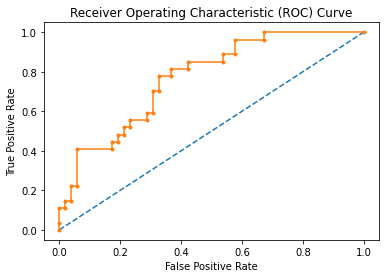

In [27]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()